# **Analisis Sentimen Berbasis LSTM dan Pemodelan Topik Berbasis LDA pada Tweet Mengenai Mobil di Indonesia**

## **Load Dataset**

Data Understanding:
*   Data berasal dari twitter.
*   Keywords yang digunakan untuk pengambilan data: "toyota indonesia",    "daihatsu indonesia", "honda indonesia", "hyundai indonesia", "suzuki indonesia", "mitsubishi indonesia", "wuling indonesia", "mobil toyota", "mobil daihatsu", "mobil honda", "mobil hyundai", "mobil suzuki", "mobil mitsubishi", "mobil wuling".

In [7]:
# Mengimport module yang dibutuhkan
import pandas as pd

# Link url data yang diupload di github
url = "https://github.com/syahelrusfi21/Deep-Learning-Project/raw/main/tweets-bm.csv"

# Membuka file CSV dalam bentuk pandas DataFrame
data = pd.read_csv(url)
print(data.shape) # Mencetak ukuran dimensi data
data.head(5)

(2124, 18)


,id_,created_at,tweetID,tweet,username,id_str,name,entity,commentcount,likes,retweets,quotes,replies,sentiment,bidang,gender,link,imageUrl
0,1,2023-01-01 13:50:44,1609547674893844481,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",TangselSmkn2,1414792059257380864,SMKN2Tangsel,Daihatsu,0.0,NaN,NaN,NaN,1,NaN,NaN,NaN,https://twitter.com/TangselSmkn2,https://pbs.twimg.com/profile_images/155974970...
1,2,2023-01-01 11:00:01,1609504712012795907,Shin Tae-yong selaku pelatih kepala Timnas Ind...,PSSI,2363027508,PSSI,Mitsubishi,31.0,1837302.0,159.0,24686.0,31,NaN,NaN,NaN,https://twitter.com/PSSI/status/16095047120127...,https://pbs.twimg.com/media/FlYVvBCaUAA-LHy.jp...
2,3,2023-01-02 09:41:59,1609847465347543042,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,GampongSuzuki,971377286,Gampong Suzuki,Suzuki,0.0,140.0,72.0,1510.0,0,NaN,NaN,NaN,https://twitter.com/GampongSuzuki/status/16098...,https://pbs.twimg.com/media/FldTuxJakAQTrqR.jp...
3,4,2023-01-03 07:19:49,1610174074210160641,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,toyotamedan_id,732457105,Toyota Medan 082167506001,Toyota,0.0,642.0,1.0,757.0,0,NaN,NaN,NaN,https://twitter.com/toyotamedan_id/status/1610...,https://pbs.twimg.com/profile_images/147098860...
4,5,2023-01-03 02:29:01,1610100893583806465,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,HoldenKlasik,1391235014,Suka Mobil Tua,BMW,1.0,154655.0,402.0,96590.0,1,NaN,NaN,NaN,https://twitter.com/HoldenKlasik/status/161010...,https://pbs.twimg.com/media/Flg6NOsaUAAS5FA.jp...


## **Data Pre-processing dan EDA**

Pada analisis ini, hanya kolom *tweet* dan *sentiment* yang digunakan untuk mengidentifikasi sentimen dalam tweet tersebut. Sentimen dibagi menjadi tiga kelas: positif, negatif, dan netral. Pelabelan data dilakukan secara manual. Berikut adalah data yang sudah dilabeli secara manual dan akan di-*load* melalui link GitHub. Sebagai catatan, dataset yang sudah dilabeli ini telah dilakukan penanganan terhadap duplikasi data sebelumnya.

In [8]:
# Link url data yang diupload di github
url2 = 'https://github.com/syahelrusfi21/Deep-Learning-Project/raw/main/labelled_data.csv'

# Membuka file CSV dalam bentuk pandas DataFrame
labelled_data = pd.read_csv(url2)
print(labelled_data.shape)
labelled_data.head(5)

(2099, 2)


,tweet,sentiment
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",positif
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,netral
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,positif
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,netral
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,netral


In [9]:
# Import module yang dibutuhkan
import re
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenizing_text(text):
    text = re.sub(r'@[^\s]+', '', text) # Menghapus tag pengguna (username)
    text = re.sub(r'http\S+', '', text) # Menghapus tautan yang dimulai dengan 'http'
    text = re.sub(r'www\.\S+', '', text) # Menghapus tautan yang dimulai dengan 'www'
    text = re.sub(r'#\w+', '', text) # Menghapus hashtag
    text = re.sub(r'[^\w\s]', '', text) # Menghapus karakter tanda baca
    text = text.lower() # Mengubah teks menjadi lowercase (casefolding)
    text = word_tokenize(text) # Tokenisasi teks
    return text

labelled_data['tokenized_text'] = labelled_data['tweet'].apply(tokenizing_text) # Menerapkan fungsi tokenizing_text
print(labelled_data.shape) # Mencetak ukuran dimensi data
labelled_data.head(5) # Menampilkan 5 baris data pertama

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(2099, 3)


,tweet,sentiment,tokenized_text
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",positif,"[hallo, sobat, nedutase, lepas, sambut, kepala..."
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,netral,"[shin, taeyong, selaku, pelatih, kepala, timna..."
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,positif,"[suzuki, xl, 7, jawabannya, tampilan, eksterio..."
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,netral,"[baru, saja, mengirim, foto, toyota, perintis,..."
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,netral,"[dijual, bmw, e30, 318i, mesin, m10, plat, r, ..."


In [11]:
# Import module yang dibutuhkan
import requests
from nltk.corpus import stopwords
nltk.download('stopwords')

# Menghapus stopwords
def remove_stopwords(tokens):
    # Membaca stopwords standar bahasa Indonesia dari NLTK
    stop_words = set(stopwords.words('indonesian'))

    # Fungsi untuk menambahkan stopwords dari URL mentah GitHub
    def add_stopwords_from_url(url):
        response = requests.get(url)
        extra_stopwords = response.text.splitlines()
        stop_words.update(extra_stopwords)

    url_stopword = 'https://github.com/syahelrusfi21/Deep-Learning-Project/raw/main/stopwords-id.txt'

    # Tambahkan stopwords dari URL mentah
    add_stopwords_from_url(url_stopword)

    # # Menghapus stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

labelled_data['cleaned_text'] = labelled_data['tokenized_text'].apply(remove_stopwords) # Menerapkan fungsi remove_stopwords
labelled_data # Menampilkan dataframe

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet,sentiment,tokenized_text,cleaned_text
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",positif,"[hallo, sobat, nedutase, lepas, sambut, kepala...","[lepas, sambut, terima, selamat]"
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,netral,"[shin, taeyong, selaku, pelatih, kepala, timna...","[indonesia, kontra]"
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,positif,"[suzuki, xl, 7, jawabannya, tampilan, eksterio...","[suzuki, tampilan, eksterior, suzuki, gagah, g..."
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,netral,"[baru, saja, mengirim, foto, toyota, perintis,...","[toyota, perintis, gatsu]"
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,netral,"[dijual, bmw, e30, 318i, mesin, m10, plat, r, ...","[dijual, bmw, mesin, plat, pajak, mulus, seles..."
...,...,...,...,...
2094,Arogansi dari anggota TNI Al Sopir grandmax ca...,negatif,"[arogansi, dari, anggota, tni, al, sopir, gran...","[arogansi, tni, al, sopir, grandmax, catering,..."
2095,"Seserahan lamaran di Kabupaten Pati, Sabtu (27...",positif,"[seserahan, lamaran, di, kabupaten, pati, sabt...","[seserahan, lamaran, kabupaten, pati, menghebo..."
2096,"Acara lamaran pernikahan di Desa Bermi, Gembon...",positif,"[acara, lamaran, pernikahan, di, desa, bermi, ...","[acara, lamaran, pernikahan, desa, bermi, gemb..."
2097,Mbah Gimux (@Luck_Java) on X Vini Vidi Vici,netral,"[mbah, gimux, on, x, vini, vidi, vici]",[]


In [12]:
# Fungsi untuk menghapus baris dimana terdapat kolom yang berisi list kosong
def remove_empty_lists(data, column):
    # Hapus baris di mana kolom berisi list kosong
    data = labelled_data[labelled_data[column].map(lambda x: not (isinstance(x, list) and len(x) == 0))]
    return data

# Terapkan fungsi ke DataFrame
cleaned_data = remove_empty_lists(data, 'cleaned_text') # Menerapkan fungsi remove_empty_lists
print(cleaned_data.shape) # Mencetak ukuran dimensi data
cleaned_data.head(5) # Menampilkan 5 baris data pertama

(2078, 4)


,tweet,sentiment,tokenized_text,cleaned_text
0,"Hallo, sobat Nedutase Lepas Sambut Kepala SMK ...",positif,"[hallo, sobat, nedutase, lepas, sambut, kepala...","[lepas, sambut, terima, selamat]"
1,Shin Tae-yong selaku pelatih kepala Timnas Ind...,netral,"[shin, taeyong, selaku, pelatih, kepala, timna...","[indonesia, kontra]"
2,SUZUKI XL 7 Jawabannya! Tampilan eksterior Suz...,positif,"[suzuki, xl, 7, jawabannya, tampilan, eksterio...","[suzuki, tampilan, eksterior, suzuki, gagah, g..."
3,Baru saja mengirim foto @ TOYOTA PERINTIS GATS...,netral,"[baru, saja, mengirim, foto, toyota, perintis,...","[toyota, perintis, gatsu]"
4,DIJUAL BMW E30 318i Mesin M10 Plat R Pajak On ...,netral,"[dijual, bmw, e30, 318i, mesin, m10, plat, r, ...","[dijual, bmw, mesin, plat, pajak, mulus, seles..."


In [13]:
# Menyimpan data hasil preprocessing ke dalam file CSV
cleaned_data.to_csv('cleaned_data.csv', index=False)

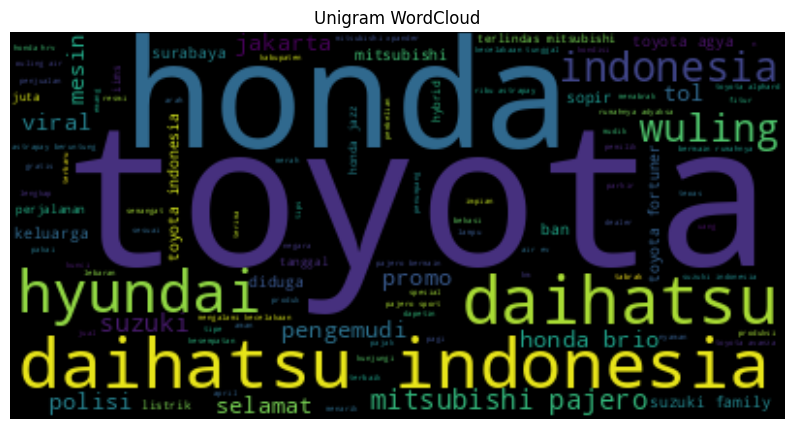

In [14]:
# Import module yang dibutuhkan
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat WordCloud dari unigram
def generate_unigram_wordcloud(text, max_words=100, title="WordCloud"):
    # Membuat WordCloud
    wordcloud = WordCloud(max_words=max_words).generate(text)

    # Menampilkan WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Kolom pada DataFrame yang ingin digunakan untuk membuat WordCloud
column_name = 'cleaned_text'  # Ubah sesuai dengan nama kolom yang ingin digunakan

# Menggabungkan teks dari kolom DataFrame menjadi satu teks
text = ' '.join(cleaned_data[column_name].apply(lambda x: ' '.join(x)))

# Membuat WordCloud unigram
generate_unigram_wordcloud(text, max_words=100, title="Unigram WordCloud")

### Merek mobil manakah yang paling populer di kalangan masyarakat Indonesia?
Berdasarkan visualisasi WordCloud, dari keywords yang digunakan untuk pengambilan data, yaitu: "toyota indonesia," "daihatsu indonesia," "honda indonesia," "hyundai indonesia," "suzuki indonesia," "mitsubishi indonesia," "wuling indonesia," "mobil toyota," "mobil daihatsu," "mobil honda," "mobil hyundai," "mobil suzuki," "mobil mitsubishi," dan "mobil wuling," terlihat bahwa mobil merek Toyota dan Honda menjadi yang paling banyak dibicarakan oleh masyarakat Indonesia di platform media sosial Twitter. Hal ini dibuktikan dengan frekuensi kemunculan kata-kata tersebut yang sangat tinggi.

Fenomena ini mengindikasikan bahwa kedua merek tersebut masih mendominasi dari segi popularitas dan kepemilikan di kalangan masyarakat Indonesia. Selain itu, merek-merek lain seperti Daihatsu, Wuling, Hyundai, Mitsubishi, Pajero, dan lain-lain juga mengikuti di belakangnya.

Insight ini menunjukkan bahwa di masa depan, tidak menutup kemungkinan merek-merek seperti Wuling dan Daihatsu bisa mendominasi pasar otomotif di Indonesia. Oleh karena itu, penting bagi perusahaan yang sudah merajai pasar otomotif di Indonesia untuk memikirkan strategi dan inovasi yang unik dan lebih baik, agar produk mereka tetap kompetitif dan tidak kalah saing dengan merek-merek lain, termasuk yang baru bermunculan.

<ipython-input-15-cb49ada71914>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['sentiment'] = cleaned_data['sentiment'].map(label_mapping)
<ipython-input-15-cb49ada71914>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=cleaned_data, x='sentiment', palette=['blue', 'green', 'red'], ax=axes[1, 1])


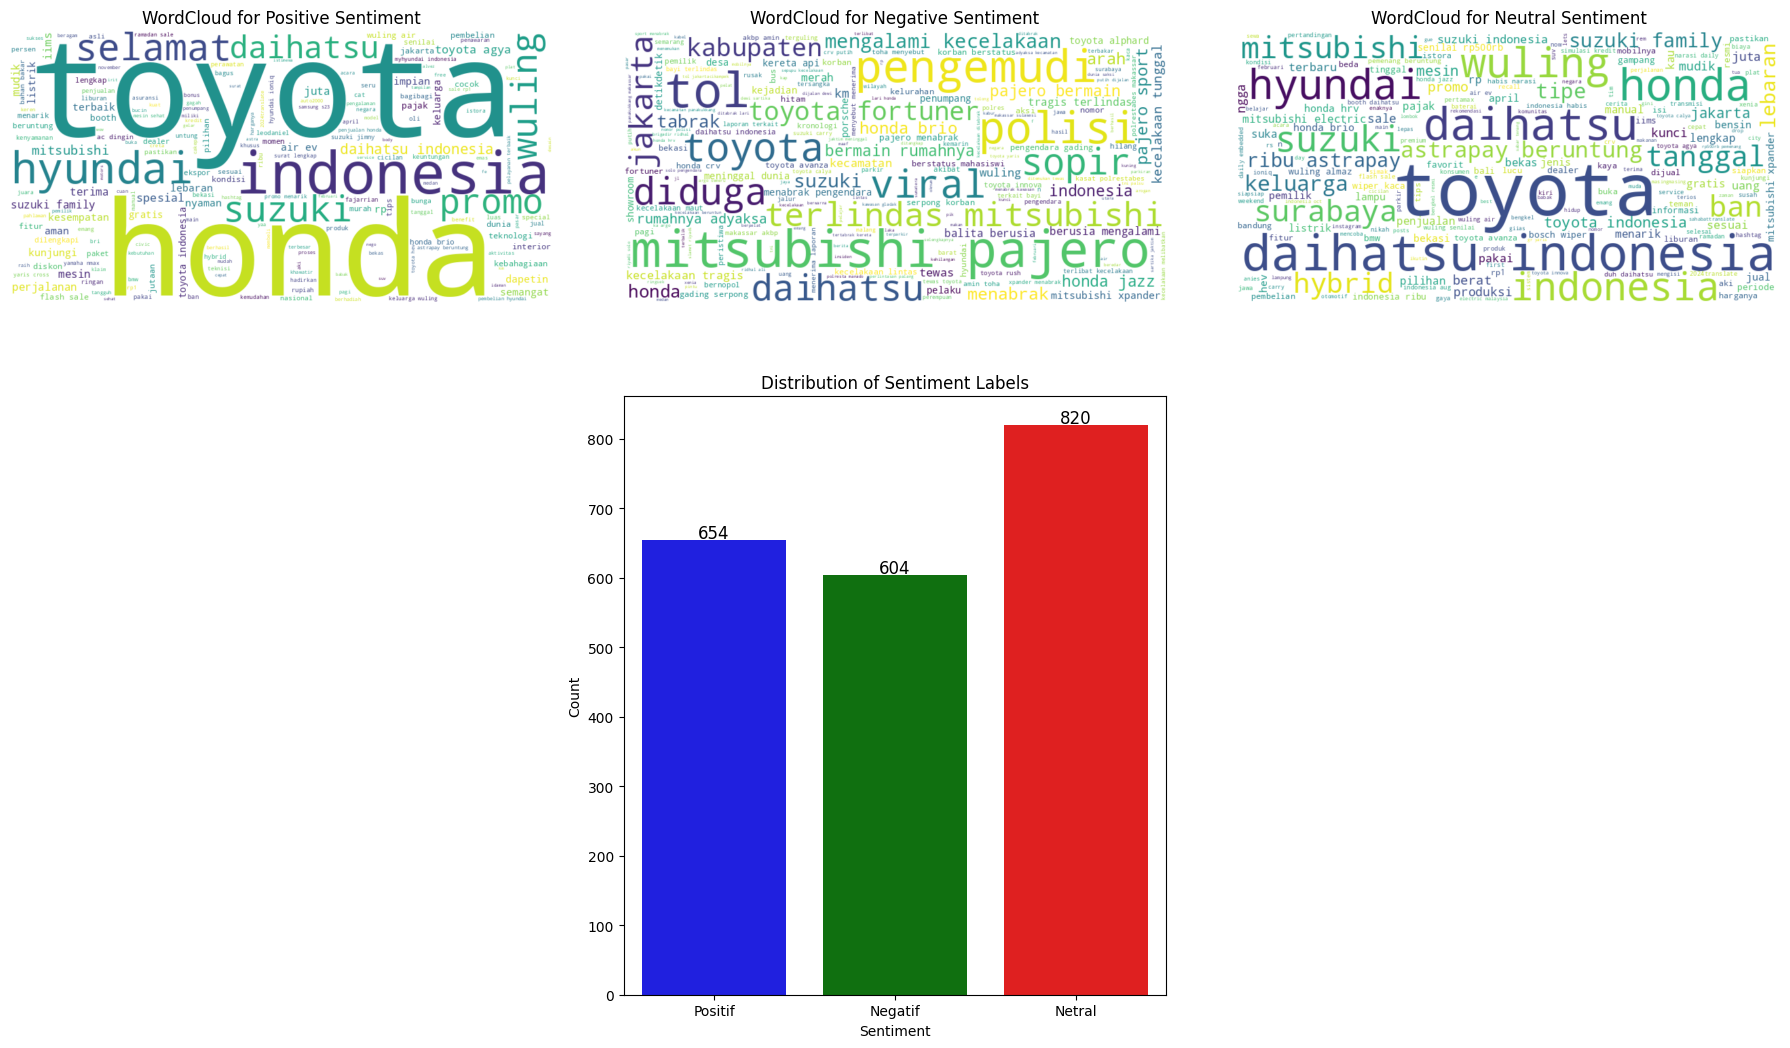

In [15]:
# Import module yang dibutuhkan
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding Labels
label_mapping = {'positif': 0, 'negatif': 1, 'netral': 2}
cleaned_data['sentiment'] = cleaned_data['sentiment'].map(label_mapping)

# Fungsi untuk menggabungkan list kata menjadi string
def combine_texts(text_list):
    return ' '.join([' '.join(text) for text in text_list])

# Filter data untuk sentimen positif, negatif, dan netral
positive_texts = cleaned_data[cleaned_data['sentiment'] == 0]['cleaned_text']
negative_texts = cleaned_data[cleaned_data['sentiment'] == 1]['cleaned_text']
neutral_texts = cleaned_data[cleaned_data['sentiment'] == 2]['cleaned_text']

# Menggabungkan teks untuk masing-masing kelas
positive_text = combine_texts(positive_texts)
negative_text = combine_texts(negative_texts)
neutral_text = combine_texts(neutral_texts)

# Fungsi untuk membuat WordCloud
def plot_wordcloud(ax, text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title)

# WordCloud untuk masing-masing kelas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

plot_wordcloud(axes[0, 0], positive_text, 'WordCloud for Positive Sentiment')
plot_wordcloud(axes[0, 1], negative_text, 'WordCloud for Negative Sentiment')
plot_wordcloud(axes[0, 2], neutral_text, 'WordCloud for Neutral Sentiment')

# Visualisasi untuk distribusi kelas
ax = sns.countplot(data=cleaned_data, x='sentiment', palette=['blue', 'green', 'red'], ax=axes[1, 1])
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sentiment Labels')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Positif', 'Negatif', 'Netral'])

# Menambahkan label jumlah data di setiap kelasnya
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mengatur sumbu pada subplot kosong
axes[1, 0].axis('off')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show() # Menampilkan plot

### Bagaimana distribusi sentimen dari data tweet tersebut? Sentimen apakah yang paling mendominasi?
Berdasarkan visualisasi tersebut, terdapat 654 data dengan sentimen positif, 604 data dengan sentimen negatif, dan 820 data dengan sentimen netral. Distribusi data ini tidak terlalu *imbalanced* secara signifikan, sehingga saya memutuskan untuk tidak melakukan *oversampling* atau *undersampling*.

Jika kita lihat berdasarkan kelas sentimen, pembicaraan yang cenderung bersifat netral paling banyak dijumpai dalam media sosial terkait data mobil ini, diikuti oleh kelas positif yang sedikit lebih banyak dibandingkan kelas negatif. Dari beberapa WordCloud yang diperlihatkan, terlihat bahwa merek mobil tidak terlalu mempengaruhi apakah suatu merek memiliki sentimen negatif di mata masyarakat Indonesia. Kata-kata yang memuat merek mobil cenderung muncul dalam semua kelas sentimen, baik itu positif, negatif, maupun netral.

Kelas negatif dalam dataset ini cenderung berhubungan dengan kecelakaan yang melibatkan pengemudi atau kejadian lainnya. Kemungkinan besar, kelas negatif tidak mengarah kuat kepada merek mobil tertentu.

<ipython-input-96-e6cfa0592a7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['text_length'] = cleaned_data['cleaned_text'].apply(len).astype(int)


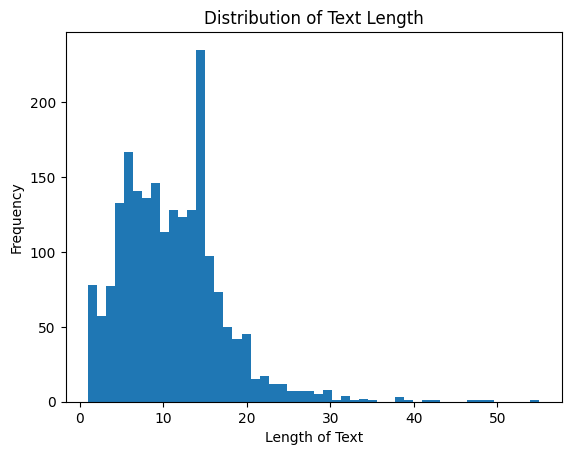

count    2078.000000
mean       11.087584
std         6.068144
min         1.000000
25%         7.000000
50%        10.000000
75%        15.000000
max        55.000000
Name: text_length, dtype: float64


In [96]:
# Menghitung panjang dari setiap teks
cleaned_data['text_length'] = cleaned_data['cleaned_text'].apply(len).astype(int)

# Plot distribusi panjang teks
plt.hist(cleaned_data['text_length'], bins=50)
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

# Menampilkan statistik deskriptif dari panjang teks
print(cleaned_data['text_length'].describe())

Panjang maksimal dari kalimat atau banyaknya kata yang ada pada kolom "cleaned_text" ialah sebanyak 55 kata. Hal ini dilakukan untuk menentukan max_length pada tahapan *padding* untuk membangun model LSTM.

In [97]:
# Mengubah tipe data ke int64
cleaned_data['text_length'] = cleaned_data['cleaned_text'].apply(len).astype(int)
cleaned_data['text_length']

<ipython-input-97-3462b5e8b63c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['text_length'] = cleaned_data['cleaned_text'].apply(len).astype(int)


0        4
1        2
2       14
3        3
4       22
        ..
2093    13
2094    20
2095    20
2096    13
2098     9
Name: text_length, Length: 2078, dtype: int64

## **Membangun Model LSTM**

### Mengklasifikasikan data "tweet" berdasarkan sentimen, yaitu positif, negatif, dan netral.

In [98]:
# Import module yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [188]:
# Dataset and DataLoader
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_length):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        text = [self.vocab.get(token, self.vocab['<unk>']) for token in text]
        text = text[:self.max_length] + [0] * max(0, self.max_length - len(text))
        return torch.tensor(text, dtype=torch.long), torch.tensor(label, dtype=torch.long)

# Memnuat vocabulary
all_tokens = [token for text in cleaned_data['cleaned_text'] for token in text]
vocab = {token: i+1 for i, token in enumerate(set(all_tokens))}
vocab['<unk>'] = len(vocab) + 1  # token untuk kata-kata yang tidak diketahui

# Train test split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data['cleaned_text'], cleaned_data['sentiment'], test_size=0.2, random_state=1507)

max_length = 57 # Jumlah kata maksimal yang diperbolehkan ada dalam teks
train_dataset = SentimentDataset(X_train.tolist(), y_train.tolist(), vocab, max_length)
test_dataset = SentimentDataset(X_test.tolist(), y_test.tolist(), vocab, max_length)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [189]:
# Membuat class untuk model LSTM
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=3):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, dropout=0.6)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.embedding(x)
        h_lstm, _ = self.lstm(x)
        x = self.fc(h_lstm[:, -1, :])
        return self.softmax(x)

# Model parameter
vocab_size = len(vocab) + 1  #Menambahkan 1 untuk token <unk>
embedding_dim = 512
hidden_dim = 512
output_dim = 3
num_layers = 3  # Lapisan LSTM

# Membangun model LSTM
model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers)

# Menampilkan arsitektur model
print(model)

LSTMModel(
  (embedding): Embedding(8334, 512)
  (lstm): LSTM(512, 512, num_layers=3, batch_first=True, dropout=0.6)
  (fc): Linear(in_features=512, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
)


## **Training and Testing Model**

In [190]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for texts, labels in test_loader:
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
    accuracy = correct / len(test_loader.dataset)
    return total_loss / len(test_loader), accuracy

# Menyimpan riwayat dari loss dan akurasi selama pelatihan
train_losses = []
test_losses = []
accuracies = []

num_epochs = 50
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_loss, accuracy = evaluate(model, test_loader, criterion, device)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    accuracies.append(accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch 1/50, Train Loss: 1.1165, Test Loss: 1.0798, Accuracy: 0.4303
Epoch 2/50, Train Loss: 1.0947, Test Loss: 1.0868, Accuracy: 0.4303
Epoch 3/50, Train Loss: 1.0965, Test Loss: 1.0805, Accuracy: 0.4303
Epoch 4/50, Train Loss: 1.0947, Test Loss: 1.0840, Accuracy: 0.4303
Epoch 5/50, Train Loss: 1.0942, Test Loss: 1.0864, Accuracy: 0.4303
Epoch 6/50, Train Loss: 1.0933, Test Loss: 1.0819, Accuracy: 0.4303
Epoch 7/50, Train Loss: 1.0985, Test Loss: 1.0796, Accuracy: 0.4279
Epoch 8/50, Train Loss: 1.0733, Test Loss: 1.0334, Accuracy: 0.4471
Epoch 9/50, Train Loss: 1.0326, Test Loss: 1.0110, Accuracy: 0.5000
Epoch 10/50, Train Loss: 0.9486, Test Loss: 1.0233, Accuracy: 0.4736
Epoch 11/50, Train Loss: 0.8165, Test Loss: 0.9009, Accuracy: 0.5649
Epoch 12/50, Train Loss: 0.7308, Test Loss: 0.8636, Accuracy: 0.5649
Epoch 13/50, Train Loss: 0.6345, Test Loss: 0.8210, Accuracy: 0.5793
Epoch 14/50, Train Loss: 0.5762, Test Loss: 0.9384, Accuracy: 0.5793
Epoch 15/50, Train Loss: 0.5333, Test Loss:

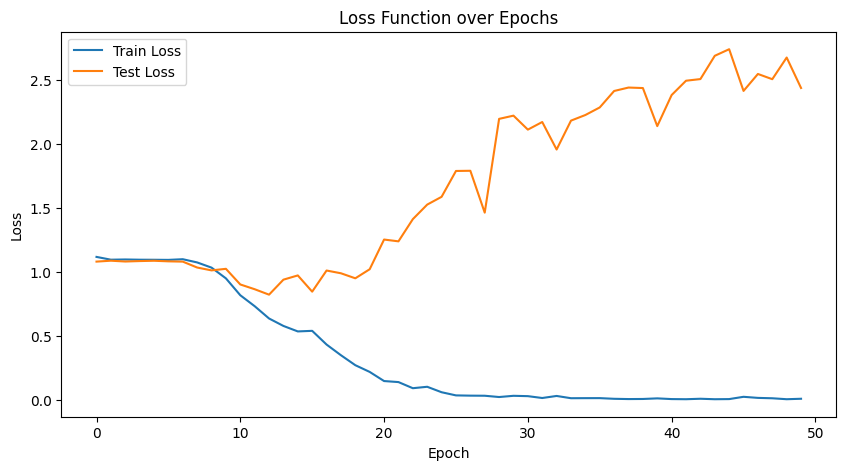

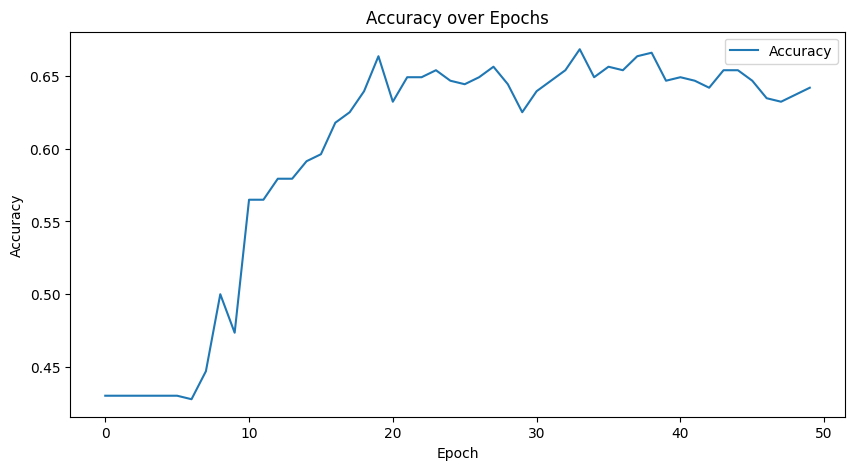

In [191]:
# Plot loss function
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function over Epochs')
plt.legend()
plt.show()

# Plot akurasi
plt.figure(figsize=(10, 5))
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

Berdasarkan pelatihan model yang telah dilakukan, terdapat indikasi overfitting pada model. Hal ini terlihat dari meningkatnya loss function pada data uji, sementara loss function pada data latih mengalami penurunan. Akibatnya, akurasi model masih sekitar 64%, meskipun grafik akurasi menunjukkan peningkatan.

Saya telah melakukan hyperparameter tuning dengan mengubah berbagai parameter seperti learning rate, epoch, dropout, dan menambah layer LSTM. Namun, karena keterbatasan waktu dan sumber daya, pelatihan model ini belum mencapai hasil yang optimal untuk LSTM. Sebagai saran, mungkin dapat dipertimbangkan untuk menggunakan model lain, seperti BERT atau transformer, di masa depan.

## **Evaluasi Model**

In [192]:
# Import module yang dibutuhkan
from sklearn.metrics import classification_report, confusion_matrix

y_true = [] # list kosong untuk data aktual
y_pred = [] # list kosong untuk data hasil prediksi

model.eval()
with torch.no_grad():
    for texts, labels in test_loader:
        texts, labels = texts.to(device), labels.to(device)
        outputs = model(texts)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Membuat confussion matrix
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[ 79   3  52]
 [  6  75  22]
 [ 54  12 113]]
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       134
           1       0.83      0.73      0.78       103
           2       0.60      0.63      0.62       179

    accuracy                           0.64       416
   macro avg       0.67      0.65      0.66       416
weighted avg       0.65      0.64      0.64       416



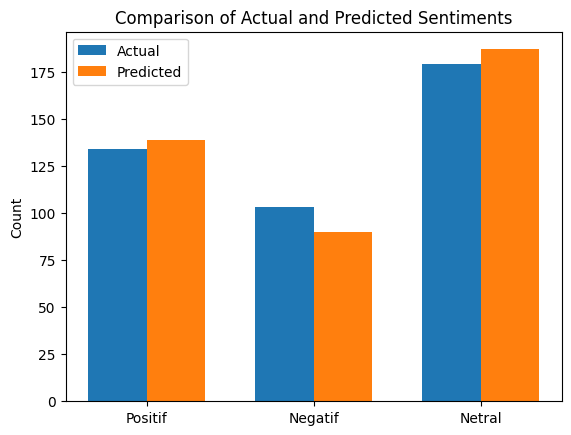

In [193]:
# Import module yang dibutuhkan
import matplotlib.pyplot as plt

# Menghitung banyaknya kejadian untuk setiap sentimen pada data aktual dan data prediksi
actual_counts = np.bincount(y_true)
predicted_counts = np.bincount(y_pred)

# Membuat label untuk tiap-tiap kelas
labels = ['Positif', 'Negatif', 'Netral']

# Membuat bar chart untuk membandingkan data prediksi dengan data aktual
x = np.arange(len(labels))  # lokasi label
width = 0.35  # lebar diagram

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

# Memberi nama untuk labels, judul dan x-axis tick labels, dll.
ax.set_ylabel('Count')
ax.set_title('Comparison of Actual and Predicted Sentiments')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menampilkan grafik
plt.show()

Berdasarkan hasil evaluasi model, terlihat bahwa terdapat hasil yang cukup baik dari perbedaan distribusi antara data aktual dan data hasil prediksi. Namun, karena terdapat kecurigaan bahwa model mengalami overfitting selama proses pelatihan, kita perlu berhati-hati dalam menafsirkan hasil evaluasi ini.

## **Menyimpan Model**

In [195]:
# Menyimpan model dan optimizer
model_save_path = 'model.pth'
torch.save(model.state_dict(), model_save_path)
print(f'Model berhasil disimpan di {model_save_path}')

Model berhasil disimpan di model.pth


Link google drive trained model: https://drive.google.com/file/d/1LpLjeuCLFjdZtPNoBl-OyPX4mFBe7iPy/view?usp=sharing


## **Pemodelan Topik dengan LDA (*Latent Dirichlet Allocation*)**

### Mengetahui topik bahasan apa saja yang termuat dari data "tweet" berdasarkan kelas sentimen positif, negatif, dan netral.


LDA for Positive Sentiment
Coherence Score:  0.48458959579757344


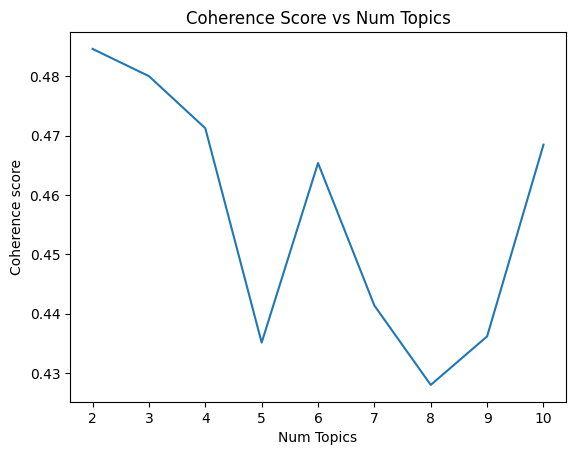

[(0,
  '0.015*"suzuki" + 0.011*"toyota" + 0.010*"honda" + 0.010*"indonesia" + '
  '0.008*"hyundai" + 0.008*"selamat" + 0.004*"family" + 0.004*"auto" + '
  '0.003*"mudik" + 0.003*"wuling"'),
 (1,
  '0.014*"indonesia" + 0.013*"toyota" + 0.012*"daihatsu" + 0.012*"wuling" + '
  '0.008*"rp" + 0.008*"promo" + 0.007*"honda" + 0.006*"mitsubishi" + '
  '0.006*"hyundai" + 0.005*"spesial"')]


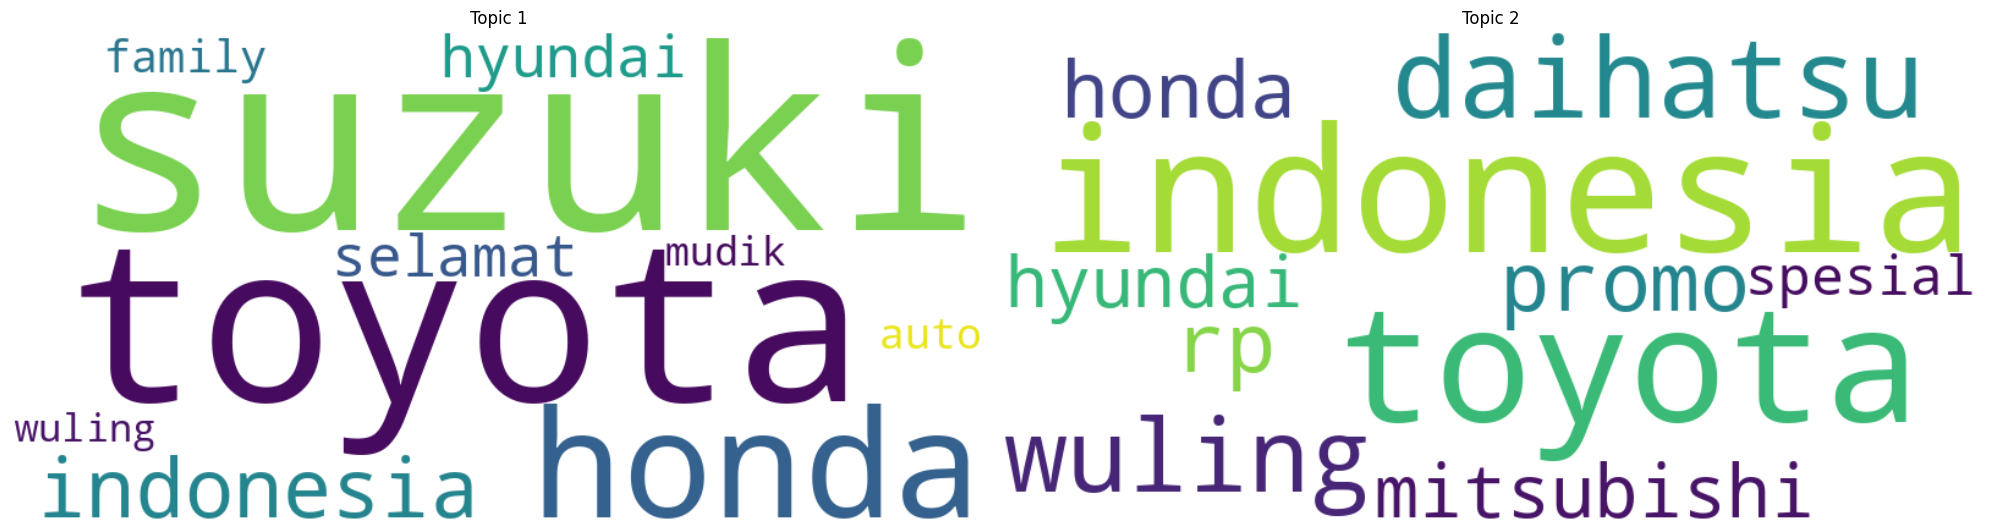


LDA for Negative Sentiment
Coherence Score:  0.4107689194162377


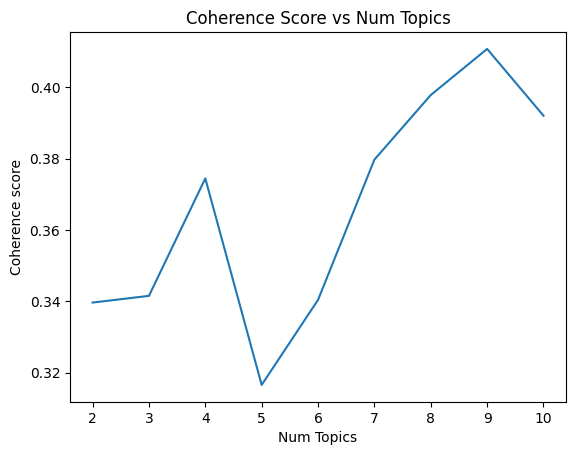

[(0,
  '0.021*"pengemudi" + 0.018*"toyota" + 0.018*"honda" + 0.017*"kecelakaan" + '
  '0.016*"fortuner" + 0.010*"viral" + 0.009*"tol" + 0.008*"brio" + '
  '0.008*"polisi" + 0.007*"pelat"'),
 (1,
  '0.018*"toyota" + 0.010*"daihatsu" + 0.009*"indonesia" + 0.008*"kecelakaan" '
  '+ 0.008*"tewas" + 0.008*"polisi" + 0.008*"ridhal" + 0.008*"korban" + '
  '0.007*"brigadir" + 0.006*"alphard"'),
 (2,
  '0.014*"toyota" + 0.010*"mitsubishi" + 0.009*"kecelakaan" + 0.009*"pajero" + '
  '0.009*"tol" + 0.009*"terlindas" + 0.009*"suzuki" + 0.009*"kasat" + '
  '0.008*"laporan" + 0.008*"makassar"'),
 (3,
  '0.024*"kecelakaan" + 0.016*"mitsubishi" + 0.015*"mengalami" + '
  '0.014*"pajero" + 0.014*"bermain" + 0.014*"rumahnya" + 0.014*"adyaksa" + '
  '0.013*"terlindas" + 0.012*"tol" + 0.011*"berusia"'),
 (4,
  '0.011*"toyota" + 0.009*"menabrak" + 0.008*"honda" + 0.007*"pengemudi" + '
  '0.007*"sopir" + 0.007*"showroom" + 0.007*"xpander" + 0.006*"hitam" + '
  '0.006*"mitsubishi" + 0.006*"fortuner"'),
 (5,
 

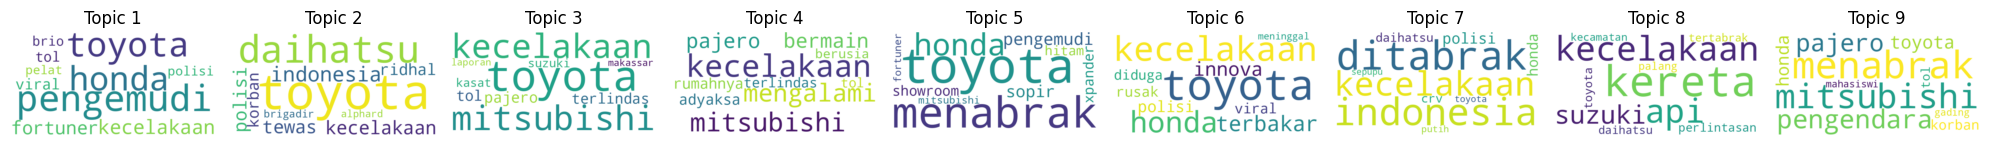


LDA for Neutral Sentiment
Coherence Score:  0.5604208659736175


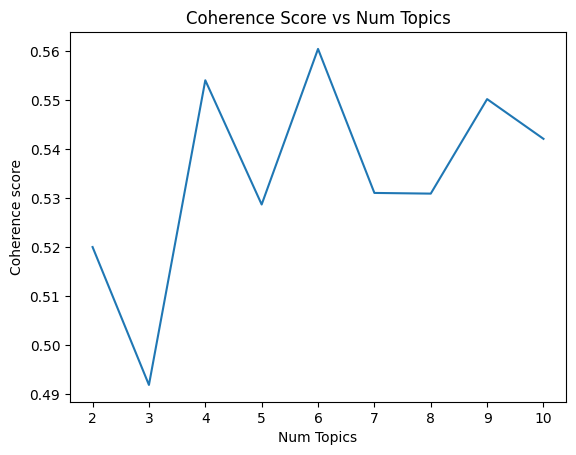

[(0,
  '0.025*"daihatsu" + 0.016*"indonesia" + 0.016*"astrapay" + 0.013*"ribu" + '
  '0.013*"beruntung" + 0.006*"suzuki" + 0.005*"ikutin" + 0.004*"bagibagi" + '
  '0.004*"lebaran" + 0.004*"rp"'),
 (1,
  '0.034*"toyota" + 0.028*"indonesia" + 0.019*"daihatsu" + 0.011*"rp" + '
  '0.010*"wuling" + 0.008*"honda" + 0.006*"yaris" + 0.006*"tanggal" + '
  '0.005*"berat" + 0.005*"senilai"'),
 (2,
  '0.014*"suzuki" + 0.013*"mitsubishi" + 0.012*"indonesia" + 0.007*"daihatsu" '
  '+ 0.007*"surabaya" + 0.006*"hyundai" + 0.006*"xpander" + 0.005*"electric" + '
  '0.005*"family" + 0.005*"malaysia"'),
 (3,
  '0.017*"honda" + 0.008*"toyota" + 0.006*"brio" + 0.006*"wuling" + '
  '0.006*"hyundai" + 0.006*"hybrid" + 0.006*"hrv" + 0.005*"ban" + '
  '0.005*"suzuki" + 0.004*"indonesia"'),
 (4,
  '0.015*"indonesia" + 0.012*"daihatsu" + 0.007*"astrapay" + 0.007*"toyota" + '
  '0.006*"wuling" + 0.006*"honda" + 0.006*"kau" + 0.006*"mitsubishi" + '
  '0.005*"suzuki" + 0.003*"hyundai"'),
 (5,
  '0.012*"honda" + 0.01

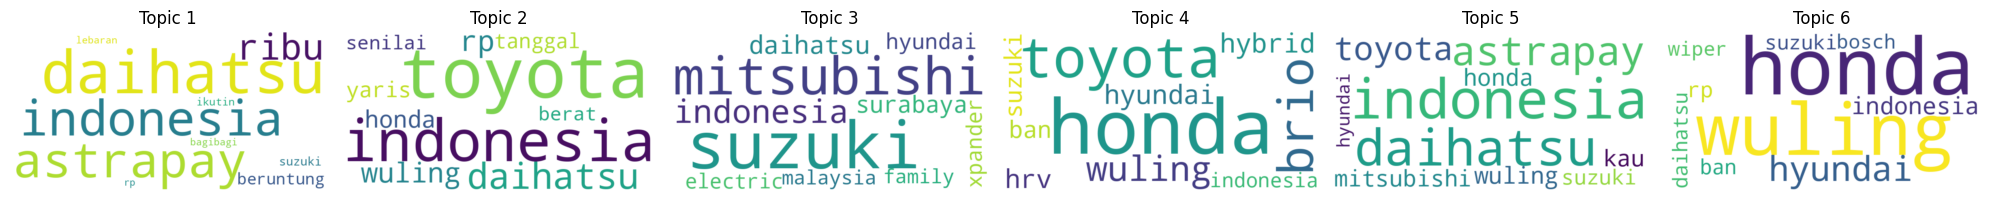

In [20]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd

# Fungsi untuk menggabungkan list kata menjadi string
def combine_texts(text_list):
    return ' '.join([' '.join(text) for text in text_list])

# Filter data untuk sentimen positif, negatif, dan netral
positive_texts = cleaned_data[cleaned_data['sentiment'] == 0]['cleaned_text']
negative_texts = cleaned_data[cleaned_data['sentiment'] == 1]['cleaned_text']
neutral_texts = cleaned_data[cleaned_data['sentiment'] == 2]['cleaned_text']

# Fungsi untuk praproses teks
def preprocess_text(texts):
    return [simple_preprocess(' '.join(text)) for text in texts]

# Praproses teks
positive_texts = preprocess_text(positive_texts)
negative_texts = preprocess_text(negative_texts)
neutral_texts = preprocess_text(neutral_texts)

# Membuat Dictionary dan Corpus untuk masing-masing kelas
def create_dictionary_corpus(texts):
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    return dictionary, corpus

positive_dictionary, positive_corpus = create_dictionary_corpus(positive_texts)
negative_dictionary, negative_corpus = create_dictionary_corpus(negative_texts)
neutral_dictionary, neutral_corpus = create_dictionary_corpus(neutral_texts)

# Fungsi untuk melatih model LDA dan menghitung coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus,
                             id2word=dictionary,
                             num_topics=num_topics,
                             random_state=1507,
                             passes=10,
                             alpha='auto',
                             per_word_topics=True)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Fungsi untuk menentukan jumlah topik optimal dan melatih model LDA
def lda_topic_modeling(texts, limit=11):
    dictionary, corpus = create_dictionary_corpus(texts)
    model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, start=2, limit=limit)
    optimal_model_index = coherence_values.index(max(coherence_values))
    optimal_model = model_list[optimal_model_index]

    # Menampilkan coherence score
    print('Coherence Score: ', max(coherence_values))

    # Visualisasi coherence score
    x = range(2, limit, 1)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.title("Coherence Score vs Num Topics")
    plt.show()

    return optimal_model, dictionary

# Fungsi untuk membuat wordcloud dari topik
def generate_wordcloud(topic_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    return wordcloud

# Fungsi untuk menampilkan topik dan wordcloud
def plot_topics_and_wordclouds(lda_model, dictionary):
    topics = lda_model.show_topics(num_words=10, formatted=False)
    topic_words = {i: dict(words) for i, words in topics}

    wordclouds = [generate_wordcloud(topic_words[i]) for i in topic_words]
    fig, axes = plt.subplots(1, len(wordclouds), figsize=(20, 10))
    for i, ax in enumerate(axes):
        ax.imshow(wordclouds[i], interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f'Topic {i+1}')

    plt.tight_layout()
    plt.show()

# Melakukan LDA untuk setiap kelas sentimen dan menampilkan hasilnya
for sentiment, texts in [('Positive', positive_texts), ('Negative', negative_texts), ('Neutral', neutral_texts)]:
    print(f"\nLDA for {sentiment} Sentiment")
    optimal_model, dictionary = lda_topic_modeling(texts)
    pprint(optimal_model.print_topics())
    plot_topics_and_wordclouds(optimal_model, dictionary)

**Kelas Positif**

Topik 0:

Kata-kata seperti: "suzuki," "toyota," "honda," "indonesia," "hyundai," "selamat," "family," "auto," "mudik," "wuling"
Interpretasi: Topik ini tampaknya berkaitan dengan pembicaraan umum tentang berbagai merek mobil di Indonesia, termasuk Suzuki, Toyota, Honda, Hyundai, dan Wuling. Kata "selamat" dan "mudik" menunjukkan konteks ucapan atau kegiatan yang mungkin berhubungan dengan periode liburan atau tradisi mudik (pulang kampung). Penyebutan "family" dan "auto" menunjukkan fokus pada mobil keluarga dan otomotif secara umum.

Topik 1:

Kata-kata seperti: "indonesia," "toyota," "daihatsu," "wuling," "rp," "promo," "honda," "mitsubishi," "hyundai," "spesial"
Interpretasi: Topik ini berkaitan dengan promosi dan penawaran spesial dari berbagai merek mobil di Indonesia seperti Toyota, Daihatsu, Wuling, Honda, Mitsubishi, dan Hyundai. Kata "rp" menunjukkan referensi ke harga atau penawaran dalam mata uang rupiah, sementara "promo" dan "spesial" menunjukkan fokus pada diskon atau penawaran khusus yang mungkin sedang berlangsung.

**Kelas Negatif**

Untuk topik-topik pada kelas sentimen negatif ini, secara keseluruhan berkaitan dengan kecelakaan lalu lintas oleh pengemudi mobil honda, toyota, daihatsu, mitsubishi, pajero hingga suzuki. Kecelakaan tersebut bahkan ada yang sampai merenggut nyawa, dan lokasi kejadian kecelakaan tersebut cukup beragam, mulai dari jalan tol hingga perlintasan kereta api.

**Kelas Netral**

Topik 0:
Kata-kata seperti: "daihatsu," "indonesia," "astrapay," "ribu," "beruntung," "suzuki," "ikutin," "bagibagi," "lebaran," "rp"
Interpretasi: Topik ini mungkin berkaitan dengan promosi atau kontes yang melibatkan merek Daihatsu dan Astrapay di Indonesia. Kata "beruntung," "ikutin," dan "bagibagi" menunjukkan adanya kampanye promosi yang menawarkan hadiah tertentu, terutama selama periode lebaran.

Topik 1:
Kata-kata seperti: "toyota," "indonesia," "daihatsu," "rp," "wuling," "honda," "yaris," "tanggal," "berat," "senilai"
Interpretasi: Topik ini tampaknya terkait dengan berbagai merek mobil di Indonesia, terutama Toyota dan Daihatsu. Penyebutan "yaris" dan "senilai" serta penggunaan "rp" menunjukkan bahwa topik ini mungkin membahas harga atau nilai mobil-mobil ini di Indonesia.

Topik 2:
Kata-kata seperti: "suzuki," "mitsubishi," "indonesia," "daihatsu," "surabaya," "hyundai," "xpander," "electric," "family," "malaysia"
Interpretasi: Topik ini mungkin berkaitan dengan pasar mobil di Indonesia dan Malaysia, dengan fokus pada merek-merek seperti Suzuki, Mitsubishi, dan Hyundai. Kata "xpander" menunjukkan penyebutan model tertentu, sedangkan "electric" mungkin mengindikasikan diskusi tentang mobil listrik.

Topik 3:
Kata-kata seperti: "honda," "toyota," "brio," "wuling," "hyundai," "hybrid," "hrv," "ban," "suzuki," "indonesia"
Interpretasi: Topik ini tampaknya berkaitan dengan berbagai model mobil dari Honda (seperti Brio dan HRV) serta diskusi tentang mobil hybrid. Penyebutan "ban" menunjukkan diskusi tentang aspek teknis atau perawatan mobil.

Topik 4:
Kata-kata seperti: "indonesia," "daihatsu," "astrapay," "toyota," "wuling," "honda," "kau," "mitsubishi," "suzuki," "hyundai"
Interpretasi: Topik ini mungkin terkait dengan promosi atau kampanye yang melibatkan beberapa merek mobil di Indonesia, seperti Daihatsu, Toyota, dan Wuling. Penyebutan "astrapay" menunjukkan adanya aspek finansial atau pembayaran yang terlibat.

Topik 5:
Kata-kata seperti: "honda," "wuling," "hyundai," "indonesia," "rp," "ban," "suzuki," "daihatsu," "wiper," "bosch"
Interpretasi: Topik ini mungkin membahas merek-merek mobil seperti Honda, Wuling, dan Hyundai di Indonesia, dengan diskusi tambahan tentang komponen mobil seperti ban dan wiper. Penyebutan "bosch" menunjukkan kemungkinan diskusi tentang merek komponen tersebut.